## YIN algorithm, implemented in Aubio: https://aubio.org/

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import aubio

In [8]:
# YIN pitches
filename='avmA.wav'
downsample = 1
samplerate = 0
win_s = 1764 // downsample # fft size
hop_s = 441 // downsample # hop size
s = aubio.source(filename, samplerate, hop_s)
samplerate = s.samplerate
tolerance = 0.1

pitch_o = aubio.pitch("yin", win_s, hop_s, samplerate) 
#pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitchesYIN = []
total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    pitch = int(round(pitch))
    confidence = pitch_o.get_confidence()
    pitchesYIN += [pitch]
    confidences += [confidence]
    total_frames += read
    if read < hop_s:
         break        

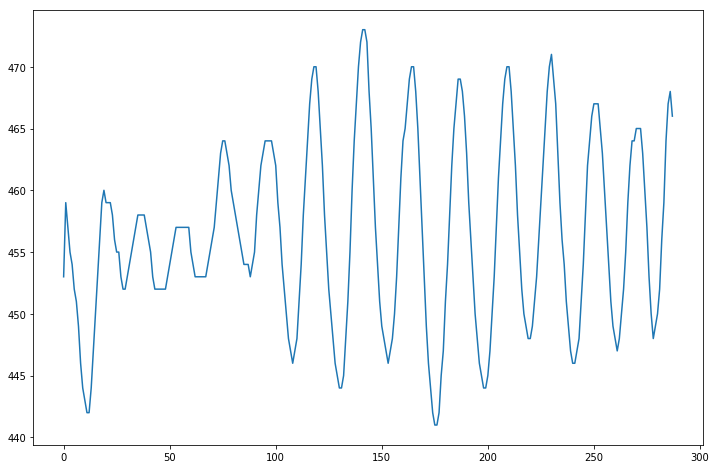

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(1,1,1)    
plt.plot(np.asarray(pitchesYIN[2:len(pitchesYIN)]))

In [13]:
def gearbox(speed=1, gear1=2, gear2=4):
    output=speed*gear1+speed*gear2 
    return output

In [16]:
gearbox(3, 4, 7)

33

In [26]:
def extractf0(filename="avmA.wav",array="pitchesyin_a", sr=0, downsample=1,f0="yin", tolerance=0.1, ):
    array=[]
    win_s = 1764 // downsample # fft size
    hop_s = 441 // downsample # hop size
    s = aubio.source(filename, sr, hop_s)
    samplerate = s.samplerate
    pitch_o = aubio.pitch(f0, win_s, hop_s, samplerate) 
    pitch_o.set_tolerance(tolerance)
    
    total_frames = 0
    while True:
        samples, read = s()
        pitch = pitch_o(samples)[0]
        pitch = int(round(pitch))
        array += [pitch]
        total_frames += read
        if read < hop_s:
             break        
    return array
    

In [62]:
extractf0("avmA.wav", "pitchesyin_a")
extractf0("avmVe.wav", "pitchesyin_ve")
extractf0("avmMa.wav", "pitchesyin_ma")
extractf0("avmRi1.wav", "pitchesyin_ri")
extractf0("avmI.wav", "pitchesyin_i")
extractf0("avmA2.wav", "pitchesyin_a2")

[100,
 88200,
 444,
 442,
 439,
 436,
 435,
 435,
 435,
 436,
 436,
 436,
 436,
 436,
 436,
 436,
 436,
 435,
 436,
 436,
 436,
 437,
 438,
 440,
 441,
 443,
 445,
 445,
 444,
 442,
 439,
 437,
 435,
 433,
 431,
 429,
 429,
 429,
 430,
 431,
 433,
 436,
 439,
 441,
 444,
 447,
 449,
 449,
 447,
 445,
 443,
 439,
 435,
 432,
 429,
 427,
 425,
 426,
 428,
 430,
 432,
 434,
 437,
 440,
 443,
 444,
 445,
 445,
 444,
 442,
 440,
 438,
 435,
 432,
 430,
 429,
 428,
 428,
 429,
 430,
 433,
 435,
 438,
 440,
 442,
 443,
 445,
 445,
 443,
 440,
 437,
 433,
 430,
 429,
 428,
 428,
 428,
 428,
 429,
 430,
 432,
 434,
 436,
 438,
 439,
 440,
 441,
 441,
 441,
 439,
 436,
 436,
 436,
 436,
 435,
 433,
 433,
 433,
 432,
 432,
 433,
 436,
 439,
 442,
 445,
 447,
 448,
 449,
 449,
 448,
 445,
 440,
 435,
 432,
 430,
 428,
 428,
 428,
 430,
 434,
 437,
 440,
 443,
 445,
 447,
 448,
 448,
 446,
 443,
 440,
 436,
 434,
 433,
 431,
 432,
 433,
 436,
 439,
 442,
 445,
 448,
 451,
 452,
 450,
 447,
 443,
 4

[100,
 88200,
 425,
 435,
 443,
 440,
 443,
 444,
 443,
 441,
 440,
 440,
 439,
 439,
 438,
 437,
 436,
 435,
 436,
 436,
 436,
 435,
 435,
 435,
 435,
 434,
 433,
 433,
 432,
 433,
 434,
 435,
 436,
 437,
 437,
 436,
 435,
 436,
 436,
 437,
 437,
 437,
 436,
 434,
 433,
 432,
 431,
 431,
 431,
 431,
 431,
 431,
 431,
 432,
 433,
 433,
 434,
 434,
 433,
 432,
 432,
 433,
 434,
 435,
 436,
 437,
 439,
 442,
 443,
 445]

In [115]:
yinvalues1 = extractf0("avmA.wav", "pitchesyin_a")
yinvalues2 = extractf0("avmVe.wav", "pitchesyin_ve")
yinvalues3 = extractf0("avmMa.wav", "pitchesyin_ma")
yinvalues4 = extractf0("avmRi1.wav", "pitchesyin_ri")
yinvalues5 = extractf0("avmI.wav", "pitchesyin_i")
yinvalues6 = extractf0("avmA2.wav", "pitchesyin_a2")

plt.figure(figsize=(12, 10))

def subplotFunc(yinvalues,subplotNum,xlabel, ylabel, title):
    plt.subplot(3,2,subplotNum)    
    plt.plot(np.asarray(yinvalues[2:len(yinvalues)]))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
  

<Figure size 864x720 with 0 Axes>

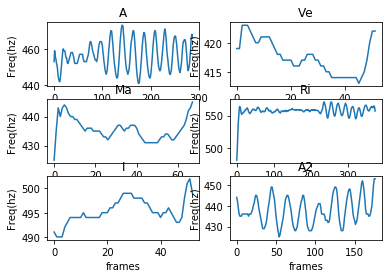

In [116]:
subplotFunc(yinvalues1, 1, "frames", "Freq(hz)", "A")
subplotFunc(yinvalues2, 2, "frames", "Freq(hz)", "Ve")
subplotFunc(yinvalues3, 3, "frames", "Freq(hz)", "Ma")
subplotFunc(yinvalues4, 4, "frames", "Freq(hz)", "Ri")
subplotFunc(yinvalues5, 5, "frames", "Freq(hz)", "I")
subplotFunc(yinvalues6, 6, "frames", "Freq(hz)", "A2")